<a href="https://colab.research.google.com/github/atomlattice/Springboard-Capstone-2/blob/main/EDA_WHO_life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the pandas, numpy libraries as pd, and np 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

import io

In [ ]:
#ACQUIRE
from google.colab import files
 
 
uploaded = files.upload()

Saving wrangled_WHO_data.csv to wrangled_WHO_data (1).csv


In [ ]:
# Put this data into a variable  
wrangled_WHO_data = pd.read_csv(io.BytesIO(uploaded['wrangled_WHO_data.csv']))

# Using the head() pandas method, observe the first three entries.
wrangled_WHO_data.head(3)

,Country,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,Percentage_Expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [ ]:
#column Status needs to be explored - what are the categories?
wrangled_WHO_data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
#developing versus undeveloped
#this seems to be the first big delineation that could affect life expectancy - do developing countries have higher life expectancy?

developing_countries = wrangled_WHO_data[(wrangled_WHO_data["Status"].str.contains("Developing"))]
developed_countries = wrangled_WHO_data[(wrangled_WHO_data["Status"].str.contains("Developed"))]

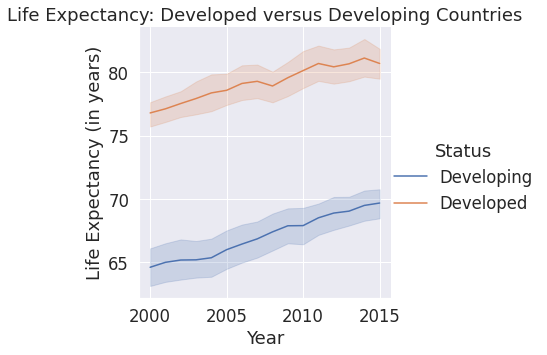

In [ ]:
#visualize
sns.set(font_scale=1.5)
sns.relplot(x="Year", y="Life_Expectancy", kind="line", hue="Status", data=wrangled_WHO_data)
plt.title("Life Expectancy: Developed versus Developing Countries", fontsize=18)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in years)")
plt.show()

CLEARLY developed countries have much higher life expectancy than developing countries. It also looks like life expectancy went up for each category over the 15 years, which could have to be more deeply considered as to why.

In [ ]:
#in here change Status DEVELOPING to 0 and DEVELOP to 1 so that we don't have to deal with strings
wrangled_WHO_data['Status'].replace(['Developing', 'Developed'],
                        [0, 1], inplace=True)
wrangled_WHO_data.head()

,Country,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,Percentage_Expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Composition_Resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


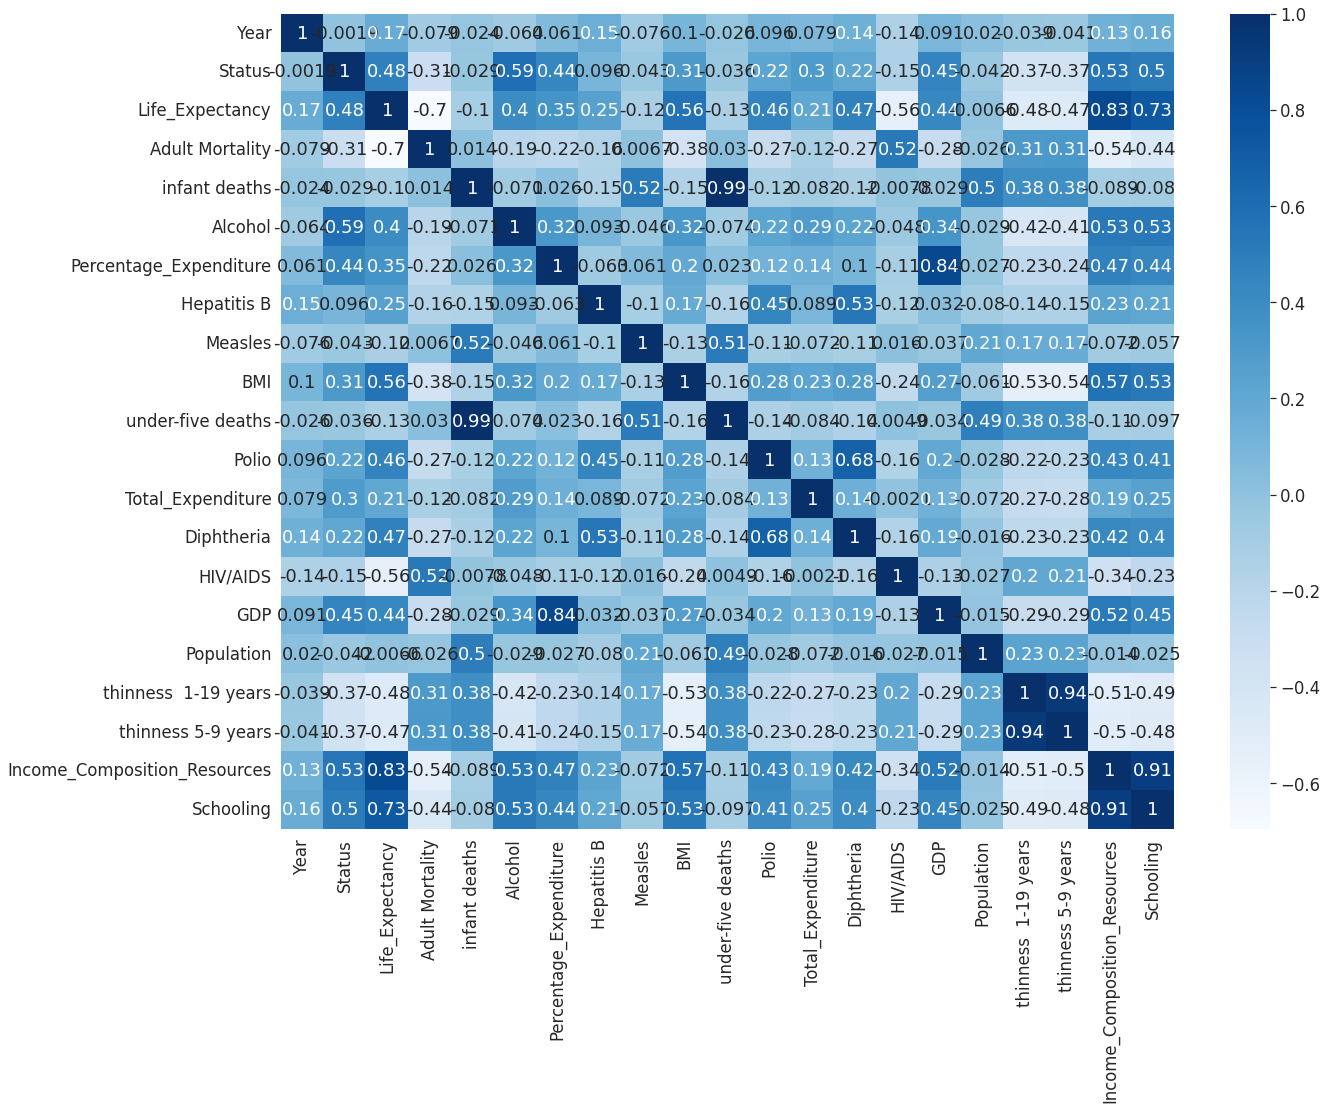

In [ ]:
#try out some other visualizations! a heat map to tease out correlations
plt.figure(figsize=(20,15))
sns.heatmap(wrangled_WHO_data.corr(),annot=True,cmap='Blues')
plt.show()

It's already looking like there are some strong correlations between some factors and life expectancy. Our previous plot clearly showed that "developing" is a factor is high life expectancy. I'm also seeing: income composition of resources (.83 - the highest), schooling (.73), Alcohol (.4), BMI (.56), GDP (.44) as being potentially related. Rates of vaccinations: Polio (.46), Diptheria (.47). As we already determined, status (developed versus developing) is very much correlated to life expectancy.

I'm fascinated to see what DOESN'T seem to correlate at all with life expectancy - HIV/AIDS, thinness, and adult mortality.

In [ ]:
#schooling
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Schooling',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to Schooling')

I'm seeing very high life expectancy in countries where citizens spend a high number of years in school (15.5-17.5 years). New Zealand seems the outlier - high life expectancy and over 20 years of schooling. These countries to take a closer look at where there is a correlation between number of years schooling and life expectancy are: Norway, Finland, Portugal, Spain, Belgium, Italy, France, Sweden.

But I'm also looking at the Democratic Republic of the Congo - high number of years for schooling, but much lower life expectancy (between 50-50 years) - other factors must be at play to lower their life expectancy. It's possible in order to be entirely accurate that we need to double check that data.

In [ ]:
# income composition of resources?
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Income_Composition_Resources',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to Income Composition of Resources')

A fascinating plot! Human Development Index in terms of income composition of resources (index ranging from 0 to 1). Income composition of resources means a country utilizes its resources productively. I'm seeing basically the same countries with a high income composition of resources and high life expectancy: Norway, Germany, New Zealand, Sweden, Belgium, France, Spain, Italy, and Portugal. This list is overlapping greatly with high life expectancy <-> number of years of schooling.

In [ ]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='BMI',color='Country',size='Year',template='plotly',title='Life Expectancy in Comparison to BMI')

BMI is average body mass of a population, the higher the number the more body mass. So of course, this one is quite misleading, because you would think the higher the BMI as a number the better, but actually the higher the number, the more someone weighs, which is usually an indicator of poor health, and therefore low life expectancy. But we are seeing that countries with high BMI (people who are overweight) have high life expectancy, so actually, low BMI isn't making people live longer. Countries with high BMI but living the longest: New Zealand, Belgium, Germany, Finland, Norway, Sweden, Spain, France, Italy.

Looking back at the heat map this isn't actually surprising considering that thinness seems to have no relation with life expectancy.

There is one weird outlier and that is Portugal with a high life expectancy but very low BMI of 10 - that is quite underweight and not healthy. May need investigation if Portugal remains an interest. 

In [ ]:
#check relationship with GDP
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='GDP',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to GDP')

Not really seeing the relationship I thought I'd see - the same countries ahead of the pack with high life expectancy actually have low GDP in comparison with many countries. So high GDP doesn't seem to be a determing factor by itself. Countries with relatively low GDP but high life expectancy: Germany, Spain, Portugal, France.

Interesting outlier: Luxembourg - high GDP, very high life expectancy. But it hasn't been showing up in regards to the other correlating factors.

In [ ]:
#checking on alcohol just in case
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Alcohol',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Alcohol')

Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol). These same countries with high life expectancy are consuming a fair amount of alcohol, comparatively, so it would indeed appear alcohol is not as important to life expectancy as schooling or income composition of resources. In fact, the countries who drink the most (Estonia, Belarus) are still living into their '70s at least, so that still confirms alcohol is not killing people at a young age to a degree of concern for this question. You also see many countries where alcohol consumption is minimal and yet they are still experiencing very low life expectancy. I don't think this will be a feature in analysis moving forward.

For further analysis based on this graph: Germany, Spain, France, New Zealand, Italy, Finland, Belgium. Portugal (although with a very low BMI - needs double checking).

Now to check polio and diptheria immunization rates:

In [ ]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Polio',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Polio Immunization')

Polio (Pol3) immunization coverage among 1-year-olds (%)

In [ ]:
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Diphtheria',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Diphtheria Immunization')

Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

Looking at the distribution here, it confirms that high immunization rates are evident among countries with high life expectancy, but also very high where life expectancy is very low. You also see countries with very low rates of immunization where people are still living into their '70s and '80s. I don't think that this is a feature to focus on moving forward.

In [ ]:
#I wanted to look at percentage expenditure
px.scatter(wrangled_WHO_data,x='Life_Expectancy',y='Percentage_Expenditure',color='Country',size='Year',template='plotly',title='Life Expectancy in Relationship to Percentage Expenditure')

Not sure if some of the data is off here - Democratic Republic of Congo has a weird behavior - very low life expectancy but high expenditure on health as a percentage of Gross Domestic Product per capita(%). I also still see countries with a low health percentage expenditure with pretty high life expectancy. So this is a bit counter intuitive.

The features to model will be SCHOOLING, and INCOME COMPOSITION OF RESOURCES.

STATUS is also correlating, but there are only 2 categories - clearly developed countries have the highest life expectancy, but as the histogram shows, the number of countries in the list that are developing far outnumber the number of developed. Such categories and how they are defined are subjective in comparison to the other 2 most correlative features.

What needs to be remembered, though, is that before adding missing values and zeros, 

1. Income composition of resources has 167 (5.7%) missing values
2. Schooling has 163 (5.5%) missing values	
3. Income composition of resources has 130 (4.4%) zeros

That's not a deal breaker but if real, correct data could be added that would make the model even more sound.